# Principal Component Analysis (PCA) on the Breast Cancer Dataset
This notebook demonstrates PCA for dimensionality reduction and exploratory analysis on the Breast Cancer dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
sns.set_theme()


## Load and Inspect the Breast Cancer Dataset
The dataset contains 569 samples with 30 numeric features, labeled as malignant or benign.

In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')  # 0 = malignant, 1 = benign
print('Feature matrix shape:', X.shape)
print('Target distribution:')
print(y.value_counts())


Feature matrix shape: (569, 30)
Target distribution:
target
1    357
0    212
Name: count, dtype: int64


In [7]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

## Data Preprocessing
- Standardize features to zero mean and unit variance before PCA.

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## How PCA Works

PCA (Principal Component Analysis) seeks a low‐dimensional orthogonal basis that captures as much of the variance in the data as possible.  The main steps are:

1. **Center the data**  
   Compute the mean of each feature and subtract it to obtain zero‐mean data:
   $$
     \bar{\mathbf{x}} = \frac{1}{N}\sum_{i=1}^N \mathbf{x}_i,
     \qquad
     \widetilde{\mathbf{X}} = \bigl[\mathbf{x}_1 - \bar{\mathbf{x}},\;\dots,\;\mathbf{x}_N - \bar{\mathbf{x}}\bigr]^\top.
   $$

2. **Compute the covariance matrix**  
   $$
     \mathbf{C}
     = \frac{1}{N-1}\,\widetilde{\mathbf{X}}^\top\,\widetilde{\mathbf{X}}
     \quad\in\mathbb{R}^{d\times d}.
   $$

3. **Eigen‐decomposition**  
   Find eigenvalues and eigenvectors of the covariance:
   $$
     \mathbf{C}\,\mathbf{v}_j = \lambda_j\,\mathbf{v}_j,
     \quad
     j=1,\dots,d,
     \quad
     \lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_d \ge 0.
   $$

4. **Form the projection matrix**  
   Select the top $k$ eigenvectors (principal directions):
   $$
     \mathbf{V}_k = \bigl[\mathbf{v}_1,\mathbf{v}_2,\dots,\mathbf{v}_k\bigr]
     \;\in\mathbb{R}^{d\times k}.
   $$

5. **Project the data**  
   Map the original data into the $k$-dimensional principal‐component space:
   $$
     \mathbf{Z} = \widetilde{\mathbf{X}}\,\mathbf{V}_k
     \;\in\mathbb{R}^{N\times k}.
   $$

6. **Explained variance**  
   Each eigenvalue $\lambda_j$ measures the variance captured by component $j$.  The fraction of total variance explained by the first $k$ components is
   $$
     \frac{\sum_{j=1}^k \lambda_j}{\sum_{j=1}^d \lambda_j}.
   $$

By projecting onto the top principal components, PCA reduces dimensionality while preserving the directions of greatest variance, enabling more efficient visualization and downstream modeling.  


## PCA via Singular Value Decomposition

If the covariance matrix does not have easily computable eigenvectors, PCA can be computed efficiently using the SVD of the centered data matrix $X\in\mathbb{R}^{N\times d}$:

1. **Compute the SVD**  
   $$
   \widetilde X = U\,\Sigma\,V^\top,
   $$  
   where  
   - $U\in\mathbb{R}^{N\times r}$ has orthonormal columns,  
   - $\Sigma=\mathrm{diag}(\sigma_1,\dots,\sigma_r)$ with $\sigma_1\ge\sigma_2\ge\cdots\ge0$,  
   - $V\in\mathbb{R}^{d\times r}$ has orthonormal columns (the principal directions).  

2. **Principal components**  
   The top $k$ principal components are given by the first $k$ columns of $V$:
   $$
   V_k = \bigl[v_1,\dots,v_k\bigr],
   \quad
   Z = \widetilde X\,V_k = U_k\,\Sigma_k,
   $$  
   where $Z\in\mathbb{R}^{N\times k}$ are the component scores.

3. **Relation to covariance eigenvalues**  
   The sample covariance $\tfrac1{N-1}\widetilde X^\top\widetilde X$ has eigenvalues
   $$
   \lambda_j = \frac{\sigma_j^2}{\,N-1\,},
   $$  
   and the **explained variance ratio** of component $j$ is
   $$
   \mathrm{EVR}_j
   = \frac{\lambda_j}{\sum_{i=1}^d \lambda_i}
   = \frac{\sigma_j^2}{\sum_{i=1}^d \sigma_i^2}.
   $$

By using SVD, PCA can be performed without explicitly forming the $d\times d$ covariance matrix, which is especially advantageous when $d$ is large or when $N<d$.  


## PCA and Explained Variance
Compute PCA on the scaled data and examine the explained variance ratio.

In [9]:
pca = PCA()
pca.fit(X_scaled)
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)
var_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained))],
    'Explained Variance': explained,
    'Cumulative Variance': cum_explained
})
var_df.head(10)


,PC,Explained Variance,Cumulative Variance
0,PC1,0.442720,0.442720
1,PC2,0.189712,0.632432
2,PC3,0.093932,0.726364
3,PC4,0.066021,0.792385
4,PC5,0.054958,0.847343
5,PC6,0.040245,0.887588
6,PC7,0.022507,0.910095
7,PC8,0.015887,0.925983
8,PC9,0.013896,0.939879
9,PC10,0.011690,0.951569


### Explained Variance Ratio
Bar plot and cumulative line for explained variance ratio.

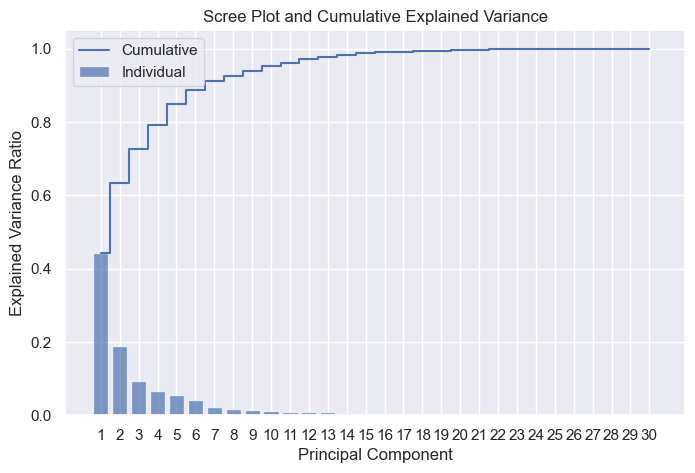

In [10]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained)+1), explained, alpha=0.7, label='Individual')
plt.step(range(1, len(cum_explained)+1), cum_explained, where='mid', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained)+1))
plt.title('Scree Plot and Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


## PCA Projection onto First Two Components
Scatter plot in the PC1-PC2 space, colored by diagnosis (malignant vs benign).

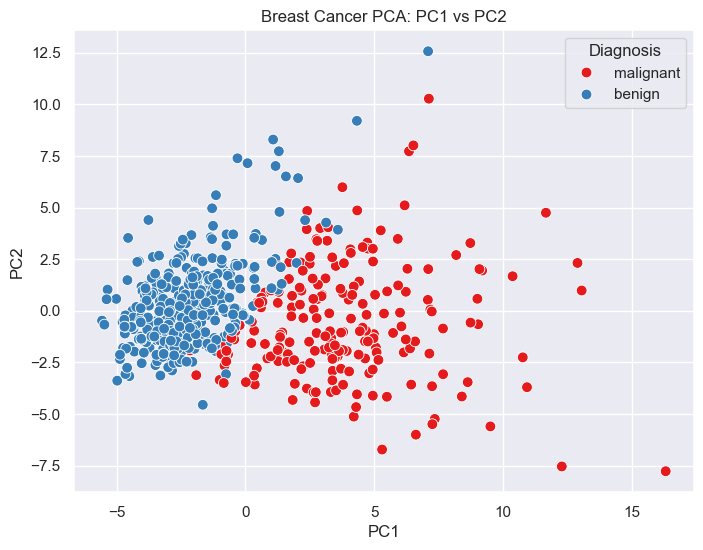

In [11]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y.map({0:'malignant',1:'benign'}), palette='Set1', s=60)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Breast Cancer PCA: PC1 vs PC2')
plt.legend(title='Diagnosis')
plt.show()


As the graph shows, the top two principal components show a good spread of the classification. 

## Feature Loadings for PC1 and PC2
Examine and plot the loadings of the original features for the first two components.

In [12]:
loadings = pd.DataFrame(pca2.components_.T, index=X.columns, columns=['PC1','PC2'])
loadings_sorted = loadings.abs().sort_values(by='PC1', ascending=False).head(10)
loadings_sorted


,PC1,PC2
mean concave points,0.260854,0.034768
mean concavity,0.258400,0.060165
worst concave points,0.250886,0.008257
mean compactness,0.239285,0.151892
worst perimeter,0.236640,0.199878
worst concavity,0.228768,0.097964
worst radius,0.227997,0.219866
mean perimeter,0.227537,0.215181
worst area,0.224871,0.219352
mean area,0.220995,0.231077


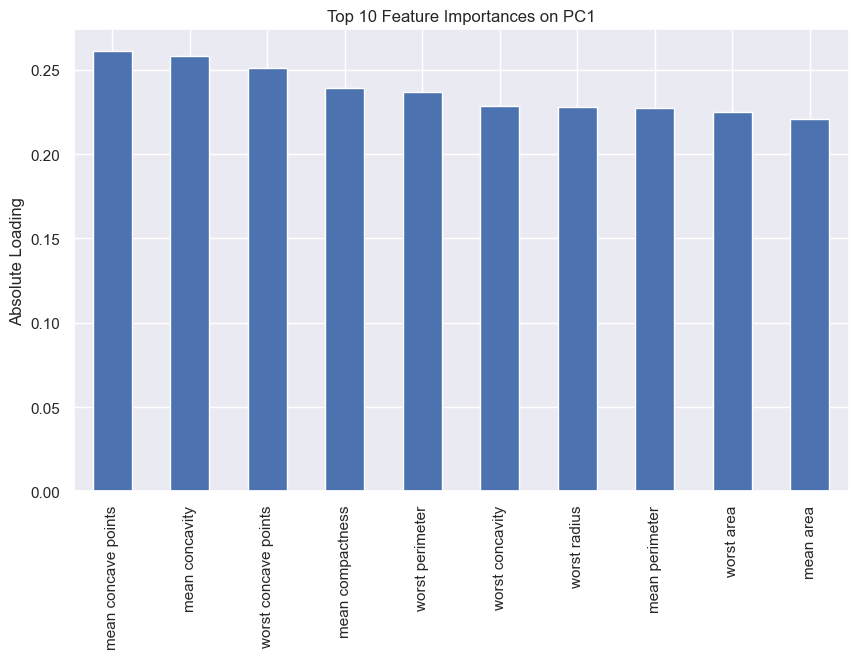

In [13]:
plt.figure(figsize=(10,6))
loadings['PC1'].abs().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances on PC1')
plt.ylabel('Absolute Loading')
plt.show()


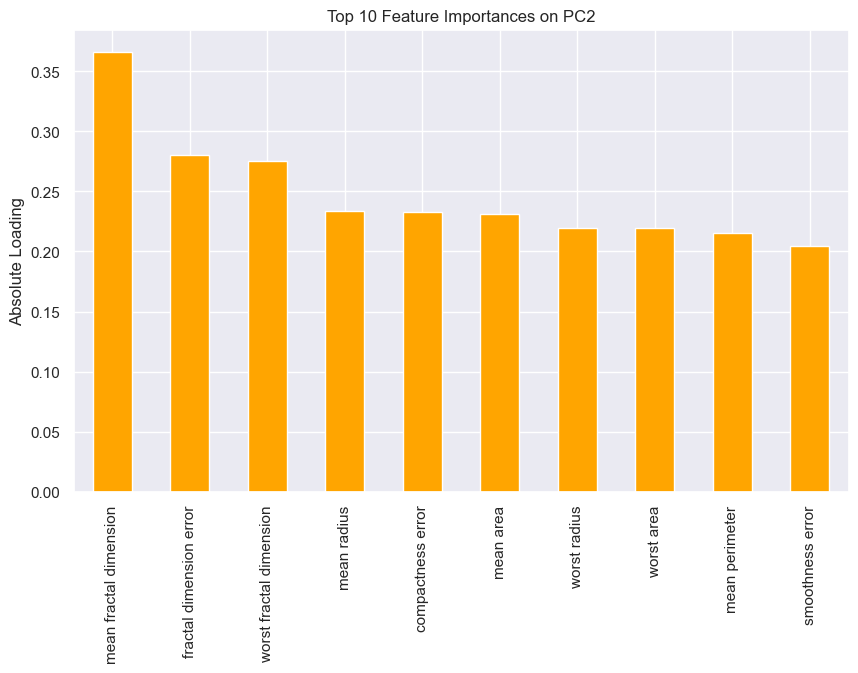

In [14]:
plt.figure(figsize=(10,6))
loadings['PC2'].abs().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Feature Importances on PC2')
plt.ylabel('Absolute Loading')
plt.show()


## Reconstruction Error vs Number of Components
Compute the MSE of reconstructed data for 1–30 components.

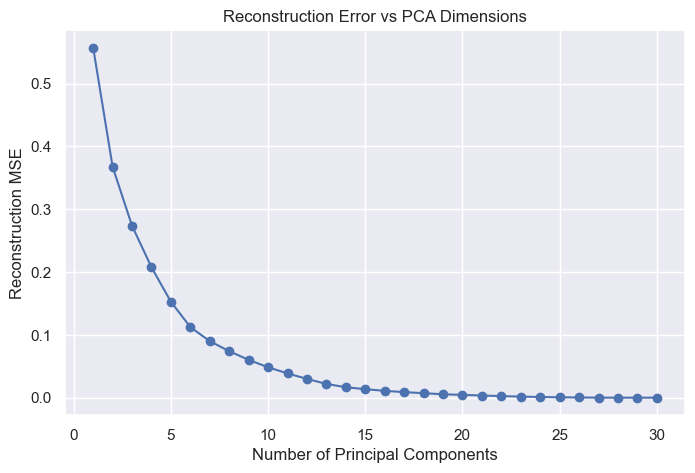

In [15]:
errors = []
components = list(range(1, X.shape[1]+1))
for k in components:
    pca_k = PCA(n_components=k)
    X_proj = pca_k.fit_transform(X_scaled)
    X_rec = pca_k.inverse_transform(X_proj)
    mse = mean_squared_error(X_scaled, X_rec)
    errors.append(mse)
plt.figure(figsize=(8,5))
plt.plot(components, errors, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Reconstruction MSE')
plt.title('Reconstruction Error vs PCA Dimensions')
plt.grid(True)
plt.show()


## Contrast: Top vs. Low‐Variance Principal Components

To see how much structure lives in the first few components compared to the very last ones, we’ll project the data onto:

- **PC1 & PC2** (the two directions of highest variance)  
- **PC29 & PC30** (the two directions of lowest variance)

and plot them side by side, colored by diagnosis.

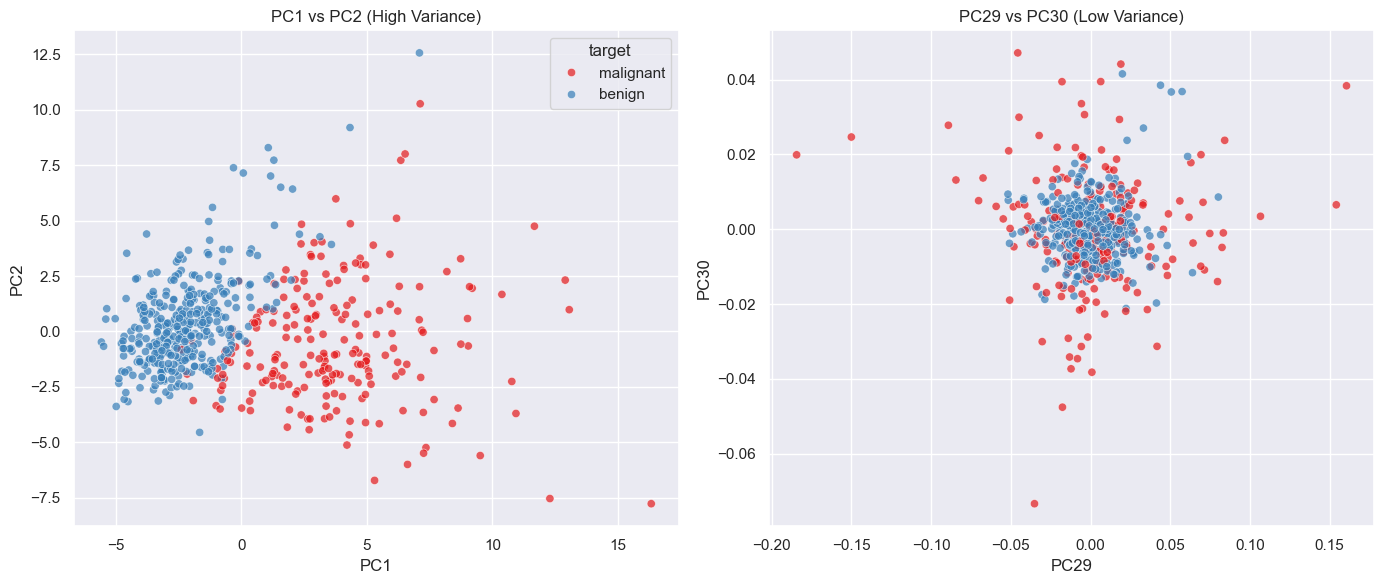

In [17]:
# full PCA scores
X_full_pca = pca.transform(X_scaled)

# top‐2 vs. low‐2
X_top2 = X_full_pca[:, :2]    # PC1, PC2
X_low2 = X_full_pca[:, -2:]    # PC29, PC30

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharex=False, sharey=False)

# Left: PC1 vs PC2
ax = axes[0]
sns.scatterplot(
    x=X_top2[:,0], y=X_top2[:,1],
    hue=y.map({0:'malignant',1:'benign'}),
    palette='Set1', alpha=0.7, ax=ax
)
ax.set_title('PC1 vs PC2 (High Variance)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Right: PC29 vs PC30
ax = axes[1]
sns.scatterplot(
    x=X_low2[:,0], y=X_low2[:,1],
    hue=y.map({0:'malignant',1:'benign'}),
    palette='Set1', alpha=0.7, ax=ax, legend=False
)
ax.set_title('PC29 vs PC30 (Low Variance)')
ax.set_xlabel('PC29')
ax.set_ylabel('PC30')

plt.tight_layout()
plt.show()


In this contrast, we see the left picture is much easier to classify than the right, as it uses the two best principal components while the right image uses two of the worst principal components, making it nearly impossible to classify.

## Observations & Conclusions
- **Explained Variance:** The first few components capture the majority of variance (e.g., PC1 and PC2 explain over ~60%).  
- **2D Projection:** PC1 and PC2 separate malignant and benign samples moderately well, suggesting linear combinations of features can distinguish diagnosis.  
- **Loadings:** Features like mean concavity and worst radius have high absolute loadings on PC1, indicating they drive the largest variance direction.  
- **Reconstruction Error:** The MSE decreases rapidly for the first ~5 components, then plateaus—implying ~5–10 PCs suffice for most variance capture.  
---
PCA effectively reduces dimensionality while preserving important structure, aiding visualization and feature reduction.